<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Applied Statistics</center></font>
<center><font size=5>Estimation and Hypothesis Testing - Week 2</font></center>




<center><img src="https://cdn.pixabay.com/photo/2023/01/07/05/28/hand-7702606_1280.jpg" width="720"></center>

<b><center><font size=5> Talent Hunt Examination Case Study</font></center></b>

## **Problem Statement**

### **Business Context**

A research institute conducts a Talent Hunt Examination every year to hire people who can work on various research projects in the field of Mathematics , Physics,Chemistry and Computer Science.

**A2Z institute** provides a preparatory program to help the aspirants prepare for the Talent Hunt Exams. The institute has a good record of helping many students clear the exams. Before the application for the next batch starts, the institute wants to attract more aspirants to their program.

**For this, the institute wants to assure the aspiring students of the quality of results obtained by students enrolled in their program in recent years.**

However, one challenge in estimating an average score is that every year the exam’s difficulty level varies a little, and the distribution of scores also changes accordingly.

However, it is known that the **standard deviation of the scores of the students of the institute is 10. **

The institute keeps a track of the scores of various subjects for its alumni who attempted the exams previously.

A dataset constituted of a simple random sample of scores of 600 aspirants from the last three years is prepared by the institute.

### **Objective**. SOLVE 3 PROBLEMS

The institute wants to get a more **robust measure of the average scores** secured by the students that accounts for the variability in scores across different years. This will help them get a better picture of the overall performance of the students and the information can also be used for marketing purposes.

**Critic's Claim** : A renowned critic has recently taken to social media to mention that the institute's preparation material for Physics and Mathematics do not have the required rigor and that students, on average, failed to clear the cut-off of 82 in these subjects last year. The institute wants to verify the validity of the critic's claim and then respond to him. The goal is to determine whether there is significant evidence to support the claim that the average scores in Physics and Mathematics are lower than the specified cut-off.

**Investor's Claim** : In light of recent increase in revenue of the institute, an investor believes that the increase is driven by an increasing amount of students clearing their exams in Computer Science and Chemistry in the last year. The institute wants to check if the investor's belief in factually correct and share an update. The aim is to assess whether there is significant evidence to support the claim that the average scores in Computer Science and Chemistry are higher than the cut-off score of 85.

### **Data Dictionary**

The dataset provided (*Talent_hunt.csv*) contains the scores of four subjects of 600 aspirants enrolled in the institute''s programs in the last three years. Each row in the dataset corresponds to a different student, and the values in each column indicate the respective performance scores of that student in the specified academic program.

- **Computer_Science**: This column contains numerical values representing the performance scores of students in the Computer Science program.

- **Chemistry**: This column contains numerical values representing the performance scores of students in the Chemistry program.

- **Mathematics**: This column contains numerical values representing the performance scores of students in the Mathematics program.

- **Physics**: This column contains numerical values representing the performance scores of students in the Physics program.



## **Solution Approach**

> 1.  **To provide a more reliable estimate of the average scores:** We will construct a 95% confidence interval for the mean scores of students in Physics, Mathematics, Computer Science, and Chemistry who have enrolled in the institute's program. This approach offers a comprehensive range of scores, providing a robust estimate.

> 2. **Critic's Claim:** To investigate the critic's claim that the mean scores of students in Physics and Mathematics are less than the previous year's cut-off of 82, we will perform a hypothesis test at a significance level of 5%. The null hypothesis will assume that the mean scores are equal to or greater than 82, and the alternative hypothesis will suggest that the mean scores are less than 82.

> 3. **Investor's Claim:** To assess the investor's claim that the mean scores of students in Computer Science and Chemistry are higher than or equal to the most recent cut-off of 85, we will conduct a hypothesis test at a significance level of 5%. The null hypothesis will assume that the mean scores are equal to or less than 85, and the alternative hypothesis will suggest that the mean scores are greater than 85. These tests will provide statistical evidence to validate or refute both the critic's and investor's perspectives, contributing to a comprehensive evaluation of the institute's performance.

## **Let us start by importing the required libraries**

## **Import the necessary libraries**



In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

# Function for handling normal distribution and statistical calculation
from scipy.stats import norm

## **Loading the dataset**

In [ ]:
# uncomment the below code cell to mount your google drive
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/datasets/')


Mounted at /content/drive


In [ ]:
path = "talent_hunt_scores.csv"
data = pd.read_csv(path)

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## **Data Overview**

In [ ]:
# looking at head (5 observations)
df.head()

,Computer_Science,Chemistry,Mathematics,Physics
0,74.41,103.29,95.21,74.25
1,83.02,88.96,74.95,96.26
2,79.57,85.67,63.88,100.01
3,75.55,84.31,99.49,91.51
4,97.16,88.70,82.81,93.38


#### **Checking the shape of the dataset**

In [ ]:
df.shape

(600, 4)

#### **Checking the data types of the columns for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Computer_Science  600 non-null    float64
 1   Chemistry         600 non-null    float64
 2   Mathematics       600 non-null    float64
 3   Physics           600 non-null    float64
dtypes: float64(4)
memory usage: 18.9 KB


#### **Statistical summary of the dataset**

In [ ]:
df.describe()

,Computer_Science,Chemistry,Mathematics,Physics
count,600.000000,600.000000,600.000000,600.000000
mean,84.920467,85.727483,81.733783,82.684317
std,9.901397,9.765809,10.468294,10.263065
min,55.390000,58.900000,40.170000,40.710000
25%,78.215000,79.147500,75.345000,75.820000
50%,84.990000,85.700000,82.115000,82.920000
75%,91.180000,91.662500,88.092500,89.672500
max,119.390000,114.270000,110.820000,111.650000


## **Exploratory Data Analysis**

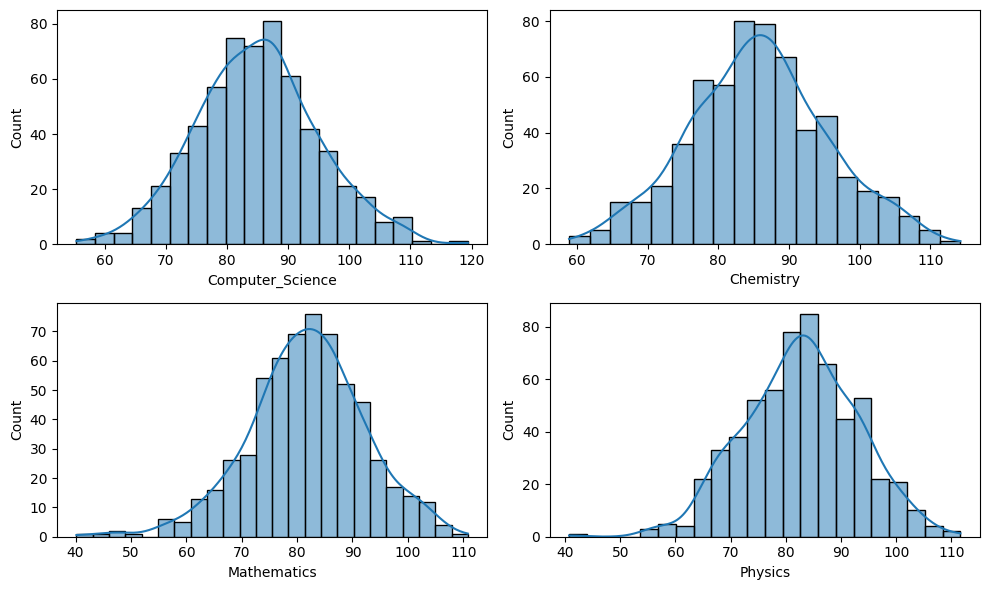

In [ ]:
# plotting histograms of the distribution of the scores
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(df['Computer_Science'], kde=True, ax=axes[0, 0])
sns.histplot(df['Chemistry'], kde=True, ax=axes[0, 1])
sns.histplot(df['Mathematics'], kde=True, ax=axes[1, 0])
sns.histplot(df['Physics'], kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

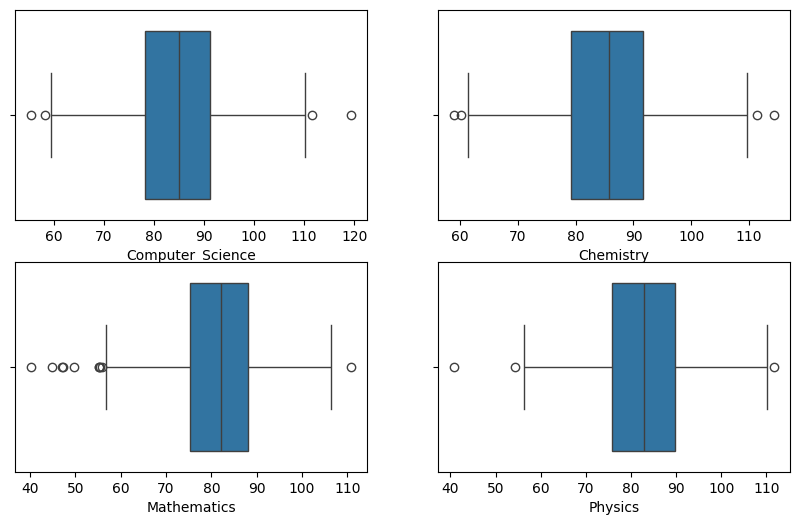

In [ ]:
# plotting boxplots to check outliers for scores
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.boxplot(x =df.Computer_Science, ax=axes[0, 0])
sns.boxplot(x =df.Chemistry, ax=axes[0, 1])
sns.boxplot(x =df.Mathematics, ax=axes[1, 0])
sns.boxplot(x =df.Physics, ax=axes[1, 1])
plt.show()

## **Reliable estimate of the average score using confidence intervals**

To provide a more reliable estimate of the average score using a range of scores instead of a single estimate, we will construct a 95% confidence interval for the mean score that an aspirant has scored after enrolling in the institute’s program.

* We saw that the distribution of the scores is not strictly normal
* For constructing a confidence interval for the mean score, we need to know the underlying distribution of the mean score, which is not available
* The Central Limit Theorem (CLT) can help us with this

**What is Central Limit Theorem (CLT)?**

The Central Limit Theorem states that the sampling distribution of the sample means will approach a normal distribution as the sample size gets bigger, no matter what the shape of the population distribution is.

Mathematically, if we are drawing multiple samples of size $n$ from a population with mean $\mu$ and standard deviation $\sigma$ and $\bar{X}$ is the random variable representing the sample mean, then $\bar{X}$ tends to follow a normal distribution as $n$ increases.

* The mean of $\bar{X}$ is equal to $\mu$
* The standard deviation of $\bar{X}$ (also called as the standard error) is equal to $\sigma/\sqrt{n}$

**As the data consists of 600 scores (data points), so $n=600 (>30)$. So, using CLT, we can say that the mean score will be approximately normally distributed.**

As the population standard deviation is known, the normal distribution will be used to calculate the confidence interval. The 95% confidence interval for the population mean can be calculated by using the `interval()` function of the `norm` class of `scipy.stats`

* The `interval()` function calculates the endpoints within which the specified percentage of values of the distribution lie, where
  * `alpha` denotes the confidence level
  * `loc` denotes the mean
  * `scale` denotes the standard deviation

It is known that the standard deviation of the scores is 10.

In [ ]:
# Given population standard deviation
sigma = 10

We have 600 observations (scores) for each subject.

In [ ]:
# Sample size
n = 600

We want to build 95\% confidence intervals.

In [ ]:
# Confidence level (alpha) for the confidence interval
alpha = 0.95

### **Confidence Interval Calculation for '*Computer_Science*' Scores**

In [ ]:
# Calculate the value of the sample mean for the 'Computer_Science' subject
score_1 = df['Computer_Science'].mean()

In [ ]:
# Construct the 95% confidence interval for the mean score in 'Computer_Science'
confidence_interval = np.round(norm.interval(alpha, loc=score_1, scale=sigma / np.sqrt(n)), 2)

# Display the confidence interval
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: [84.12 85.72]


* The 95% confidence interval calculated for the mean score in *Computer Science* is [84.12, 85.72].
* **This implies that there is a 95% probability that a student participating in the institute's program for *Computer Science* will achieve, on average, a score falling within the range of 84.12 to 85.72**

###**Confidence Interval Calculation for '*Chemistry*' Scores**

In [ ]:
# Calculate the value of the sample mean for the 'Computer_Science' subject
score_2 = df['Chemistry'].mean()

In [ ]:
# Construct the 95% confidence interval for the mean score in 'Chemistry'
confidence_interval = np.round(norm.interval(alpha, loc=score_2, scale=sigma / np.sqrt(n)), 2)

# Display the confidence interval
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: [84.93 86.53]


* The 95% confidence interval calculated for the mean score in *Chemistry* is [84.93 86.53].
* **This implies that there is a 95% probability that a student participating in the institute's program for *Chemistry* will achieve, on average, a score falling within the range of 84.93 to 86.53**

###**Confidence Interval Calculation for '*Mathematics*' Scores**

In [ ]:
# Calculate the value of the sample mean for the 'Computer_Science' subject
score_3 = df['Mathematics'].mean()

In [ ]:
# Construct the 95% confidence interval for the mean score in 'Computer_Science'
confidence_interval = np.round(norm.interval(alpha, loc=score_3, scale=sigma / np.sqrt(n)), 2)

# Display the confidence interval
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: [80.93 82.53]


* The 95% confidence interval calculated for the mean score in *Mathematics* is [80.93 82.53].
* **This implies that there is a 95% probability that a student participating in the institute's program for *Mathematics* will achieve, on average, a score falling within the range of 80.93 to 82.53**

###**Confidence Interval Calculation for '*Physics*' Scores**

In [ ]:
# Calculate the value of the sample mean for the 'Computer_Science' subject
score_4 = df['Physics'].mean()

In [ ]:
# Construct the 95% confidence interval for the mean score in 'Computer_Science'
confidence_interval = np.round(norm.interval(alpha, loc=score_4, scale=sigma / np.sqrt(n)), 2)

# Display the confidence interval
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: [81.88 83.48]


* The 95% confidence interval calculated for the mean score in *Physics* is [81.88 83.48].
* **This implies that there is a 95% probability that a student participating in the institute's program for *Physics* will achieve, on average, a score falling within the range of 81.88 to 83.48**

## **Validating the critic's claim using a hypothesis test**

To test the validity of the critic's claim that the mean score of the students from A2Z institute in subjects like physics and mathematics is less than last year’s cut-off score of 82. we will perform a hypothesis test the level of significance 5%



**Null and alternative hypotheses**

Let $\mu$ be the mean final score of all aspirants who enroll in the institute's program for physics and mathematics.

The null hypothesis can be written as

>$H_0: \mu >= 82$

against the alternate hypothesis

>$H_a: \mu < 82$

**Note**: The above hypotheses are true for both Physics and Mathematics.

It is known that the standard deviation of the scores is 10.

In [ ]:
# Given population standard deviation
sigma = 10

###**Mathematics**

**Calculate the Z-statistic value**

In [ ]:
# set the values of population mean and population standard deviation
mu = 82

# calculate the value of the sample mean from the data
score_3 = df.Mathematics.mean()

# calculate the test statistic
Mathematics_Score = (score_3 - mu) / (sigma/np.sqrt(600))
Mathematics_Score

np.float64(-0.6520949943579243)

**The Z-test statistic follows a standard normal distribution.**

Let's plot the distribution of the Z-test statistic and see where the computed test statistic lies in the plot.

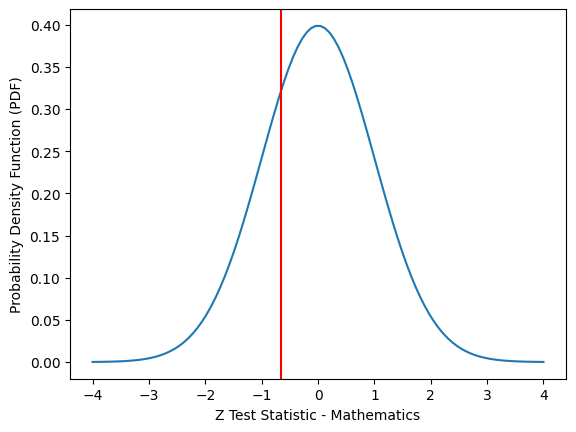

In [ ]:
# plotting the distribution of Z test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = Mathematics_Score, c = 'r') # draw a vertical red line through the mentioned point
plt.xlabel('Z Test Statistic - Mathematics')  # specify the x-axis label
plt.ylabel('Probability Density Function (PDF)')  # specify the y-axis label
plt.show() # display the plot

**P-Value**

As this is a left-tailed test, the p-value will be the area to the left of the test statistic under the standard normal curve.

In [ ]:
# calculate the p-value using the cdf() function
norm.cdf(Mathematics_Score)

np.float64(0.25716994651598596)

**Observation**

* As the p-value ~0.26 is greater than the level of significance (0.05), we fail to reject the null hypothesis
* We do not have enough statistical evidence to say that the mathematics score of all aspirants who enroll in the institute's program is less than last year's cutoff of 82


###**Physics**

**Calculate the Z-statistic value**

In [ ]:
# set the values of population mean and population standard deviation
mu = 82

# calculate the value of the sample mean from the data
score_4 = df.Physics.mean()


# calculate the test statistic
Physics_Score = (score_4 - mu) / (sigma/np.sqrt(600))
Physics_Score

np.float64(1.67622665581556)

**The Z-test statistic follows a standard normal distribution.**

Let's plot the distribution of the Z-test statistic and see where the computed test statistic lies in the plot.

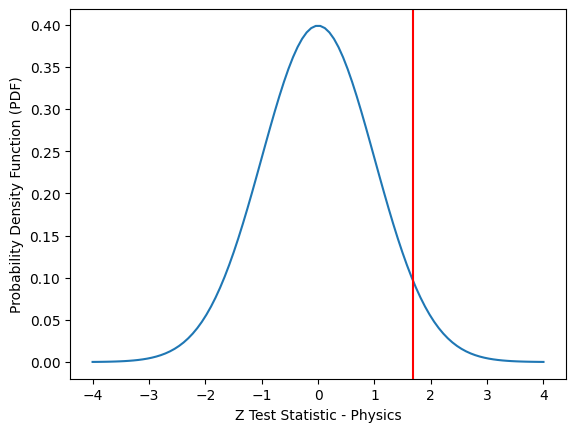

In [ ]:
# plotting the distribution of Z test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = Physics_Score, c = 'r') # draw a vertical red line through the mentioned point
plt.xlabel('Z Test Statistic - Physics')  # specify the x-axis label
plt.ylabel('Probability Density Function (PDF)')  # specify the y-axis label
plt.show() # display the plot

**P-Value**

As this is a left-tailed test, the p-value will be the area to the left of the test statistic under the standard normal curve.

In [ ]:
# calculate the p-value using the cdf() function
norm.cdf(Physics_Score)

np.float64(0.9531530975653459)

**Observation**

* As the p-value ~0.96 is greater than the level of significance (0.05), we fail to reject the null hypothesis
* We do not have enough statistical evidence to say that the physics score of all aspirants who enroll in the institute's program is less than last year's cutoff of 82


## **Validating the claim by investor using a hypothesis test**

To test the validity of the investor's belief that the mean score of the students from A2Z institute having subjects Computer Science and Chemistry is greater than or equal to the cutoff score of 85. we will perform a hypothesis test we will perform a hypothesis test  the level of significance 5%



**Null and alternative hypotheses**

Let $\mu$ be the mean final score of all aspirants who enroll in the institute's program with Computer Science and Chemistry.

The null hypothesis can be written as

>$H_0: \mu <= 85$

against the alternate hypothesis

>$H_a: \mu > 85$

It is known that the standard deviation of the scores is 10.

In [ ]:
# Given population standard deviation
sigma = 10

###**Computer Science**

**Calculate the Z-statistic value**

In [ ]:
# set the values of population mean and population standard deviation
mu = 85

# calculate the value of the sample mean from the data
score_1 = df.Computer_Science.mean()

# calculate the test statistic
Computer_Science_Score = (score_1 - mu) / (sigma/np.sqrt(600))
Computer_Science_Score

np.float64(-0.19481608420934812)

**The Z-test statistic follows a standard normal distribution.**

Let's plot the distribution of the Z-test statistic and see where the computed test statistic lies in the plot.

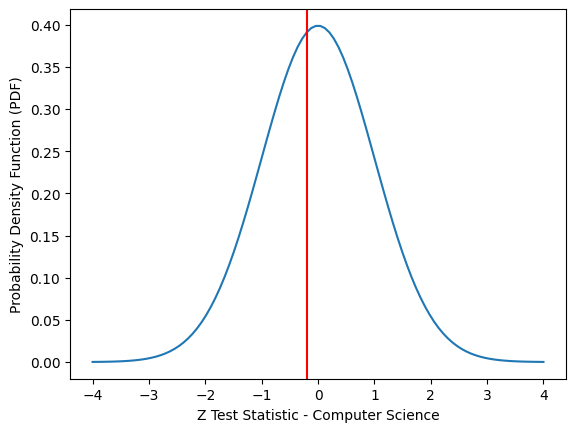

In [ ]:
# Plotting the distribution of Z test statistic along with the computed test statistic
x = np.linspace(-4, 4, 100)  # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1) )  # plot the pdf of the normal distribution
plt.axvline(x=Computer_Science_Score, c='r')  # draw a vertical red dashed line at Mathematics
plt.xlabel('Z Test Statistic - Computer Science')  # specify the x-axis label
plt.ylabel('Probability Density Function (PDF)')  # specify the y-axis label
plt.show()  # display the plot

**P-Value**

As this is a right-tailed test, the p-value will be the area to the right of the test statistic under the standard normal curve.

In [ ]:
# calculate the p-value using the cdf() function
1 - norm.cdf(Computer_Science_Score)

np.float64(0.5772315349175678)

**Observation**

* As the p-value ~0.58 is greater than the level of significance (0.05), we fail to reject the null hypothesis
* We do not have enough statistical evidence to say that the computer science score of all aspirants who enroll in the institute's program is greater than last year's cutoff of 85


###**Chemistry**

**Calculate the Z-statistic value**

In [ ]:
# set the values of population mean and population standard deviation
mu, sigma = 85, 10

# calculate the value of the sample mean from the data
score_2 = df.Chemistry.mean()

# calculate the test statistic
Chemistry_Score = (score_2 - mu) / (sigma/np.sqrt(600))
Chemistry_Score

np.float64(1.7819629630457297)

**The Z-test statistic follows a standard normal distribution.**

Let's plot the distribution of the Z-test statistic and see where the computed test statistic lies in the plot.

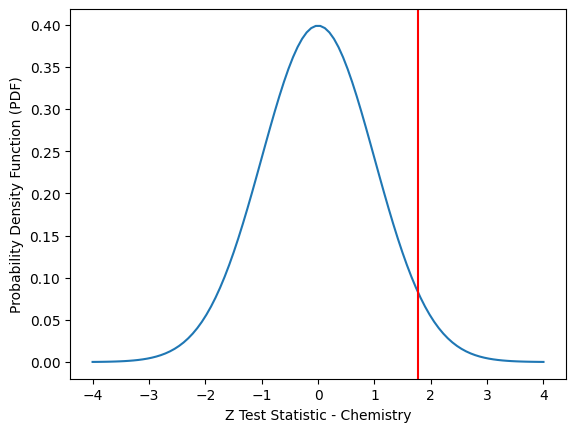

In [ ]:
# plotting the distribution of Z test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = Chemistry_Score, c = 'r') # draw a vertical red line through the mentioned point
plt.xlabel('Z Test Statistic - Chemistry')  # specify the x-axis label
plt.ylabel('Probability Density Function (PDF)')  # specify the y-axis label
plt.show() # display the plot

**P-Value**

As this is a right-tailed test, the p-value will be the area to the right of the test statistic under the standard normal curve.

In [ ]:
# calculate the p-value using the cdf() function
1 - norm.cdf(Chemistry_Score)

np.float64(0.037377635842128054)

**Observation**

* As the p-value ~0.03 is less than the level of significance (0.05), we have to reject the null hypothesis
* We have enough statistical evidence to say that the chemistry score of all aspirants who enroll in the institute's program is greater than last year's cutoff of 85


## **Conclusions and Recommendations**


*  The average scores in Computer Science, Chemistry, Mathematics, and Physics for students enrolled in A2Z institute's program are 84.92, 85.73, 81.73, and 82.68, respectively.


*   For each subject, a 95% confidence interval was constructed to provide a range of average scores with a high level of confidence.
    - Computer Science: [84.12, 85.72]
    - Chemistry: [84.93, 86.53]
    - Mathematics: [80.93, 82.53]
    - Physics: [81.88, 83.48]

* There wasn't enough statistical evidence to support the critic's claim that the score of mathematics and physics for all aspirants who enroll in the institute's program is less than last year's cut-off of 82.

* There wasn't enough statistical evidence to support the investor's belief that the score of computer science for all aspirants who enroll in the institute's program is greater than last year's cutoff of 85.

* For chemistry, enough statistcal evidence is present to support the investor's belief that the score of chemistry for all aspirants who enroll in the institute's program is greater than 85.

* The institute can extend the time frame of the data (check 5-10 years of data) to get more reliable estimates of the effect of the institute's curriculum on the aspirants' performance

* Overall the institute demonstrates strong performance in chemistry, physics, and mathematics, where enrolled students excel. However, there is a notable opportunity for improvement in the computer science program.

    - To address this, it is recommended to implement targeted interventions and support measures to enhance the academic performance of students in the computer science program.






___